<a href="https://colab.research.google.com/github/Aarav77/montypythonclassworkandhomework/blob/main/c122.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
import cv2
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:13: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  del sys.path[0]


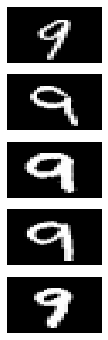

In [4]:
x, y=fetch_openml('mnist_784', version=1, return_X_y=True)
classes=['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']
endclasses=len(classes)
sampleclass=5
figure=plt.figure(figsize=(endclasses*2, (1+sampleclass)))
idx=0
for see in classes :
  idxs=np.flatnonzero(y==see)
  idxs=np.random.choice(idxs, sampleclass, replace=False)
  i=0
  for j in idxs:
    plt_idx=i*endclasses+idx+1
    p=plt.subplot(sampleclass, endclasses, plt_idx)
    p=sns.heatmap(np.reshape(x[j], (28, 28)), cmap=plt.cm.gray, xticklabels=False, yticklabels=False, cbar=False)
    p=plt.axis('off')
    i+=1
  j+=1

In [6]:
xtrain, xtest, ytrain, ytest=train_test_split(x, y, random_state=0, train_size=7500, test_size=2500)
xtrainscaled=xtrain/255
xtestscaled=xtest/255
clf = LogisticRegression(solver='saga', multi_class='multinomial').fit(xtrainscaled, ytrain)
ypred=clf.predict(xtestscaled)
print("accracy", accuracy_score(ytest, ypred))

accracy 0.9144


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_sag.py:330: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  "the coef_ did not converge", ConvergenceWarning)


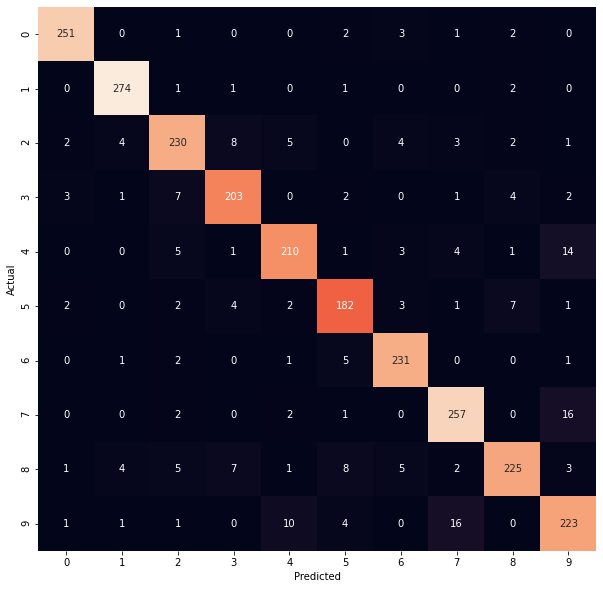

In [8]:
cm = pd.crosstab(ytest, ypred, rownames=['Actual'], colnames=['Predicted'])

p = plt.figure(figsize=(10,10));
p = sns.heatmap(cm, annot=True, fmt="d", cbar=False)